In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("../processed-data.csv")
df

,Date,Value,MovingAvg,PercAvg_Pred,ExpSmooth,RMA,RMA_Pred
0,2010-01-01,388.91,NaN,407.037443,388.91000,NaN,NaN
1,2010-02-01,390.41,NaN,407.902507,389.36000,NaN,NaN
2,2010-03-01,391.37,NaN,408.657562,389.96300,NaN,NaN
3,2010-04-01,392.67,NaN,410.147672,390.77510,NaN,NaN
4,2010-05-01,393.21,NaN,409.564129,391.50557,NaN,NaN
...,...,...,...,...,...,...,...
203,2026-12-01,NaN,NaN,NaN,NaN,NaN,NaN
204,2027-01-01,NaN,NaN,NaN,NaN,NaN,NaN
205,2027-02-01,NaN,NaN,NaN,NaN,NaN,NaN
206,2027-03-01,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
def plotTimeSeries(df, valueCol='Value', otherCols=None, title='CO2 Levels Over Time'):
    """    
    params:
        df: dataframe with the data
        valueCol: name of the main value column
        otherCols: list of other columns to plot
        title: plot title
    """
    plt.figure(figsize=(14, 6))
    
    # main value column
    plt.plot(df['Date'], df[valueCol], color='royalblue', linewidth=2, label=f'Actual {valueCol}')
    
    # plot other columns
    colors = sns.color_palette("Set2", len(otherCols))
    for i, col in enumerate(otherCols):
        if col in df.columns:
            plt.plot(df['Date'], df[col], color=colors[i], linewidth=2, 
                     linestyle='--', label=f'{col}')
    
    # add vertical line at last actual data point
    lastActualDate = df[~df[valueCol].isna()]['Date'].max()
    plt.axvline(x=lastActualDate, color='gray', linestyle='--', alpha=0.7)
    plt.text(lastActualDate, df[valueCol].max(), ' Predictions →', verticalalignment='top')
    
    plt.title(title, fontsize=14)
    plt.ylabel('CO2 (ppm)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    
    return plt


In [10]:
def plotYearlyAvg(df, valueCol='Value', otherCols=None, title='Annual CO2 Levels'):
    """
    plot yearly average CO2 levels with support for multiple data columns
    
    params:
        df: dataframe with the data
        valueCol: name of the main value column
        otherCols: list of other columns to plot
        title: plot title
    """
    dfCopy = df.copy()
    dfCopy['Year'] = pd.to_datetime(dfCopy['Date']).dt.year
    
    # prepare aggregation dictionary
    aggDict = {valueCol: 'mean'}
    for col in otherCols:
        if col in dfCopy.columns:
            aggDict[col] = 'mean'
    
    yearlyData = dfCopy.groupby('Year').agg(aggDict).reset_index()
    
    lastActualYear = dfCopy[~dfCopy[valueCol].isna()]['Year'].max()
    
    plt.figure(figsize=(14, 6))
    
    plt.plot(yearlyData['Year'], yearlyData[valueCol], 
             marker='o', color='royalblue', linewidth=2, 
             label=f'Actual {valueCol}')
    
    # plot other columns with different colors
    colors = sns.color_palette("Set2", len(otherCols))
    for i, col in enumerate(otherCols):
        if col in yearlyData.columns:
            plt.plot(yearlyData['Year'], yearlyData[col], 
                     marker='x', linestyle='--', color=colors[i], 
                     linewidth=2, label=f'{col}')
    
    # vertical line to indicate prediction boundary
    plt.axvline(x=lastActualYear, color='gray', linestyle='--', alpha=0.7)
    plt.text(lastActualYear, yearlyData[valueCol].max(), ' Predictions →', verticalalignment='top')
    
    plt.title(title, fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Average CO2 (ppm)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    
    return plt

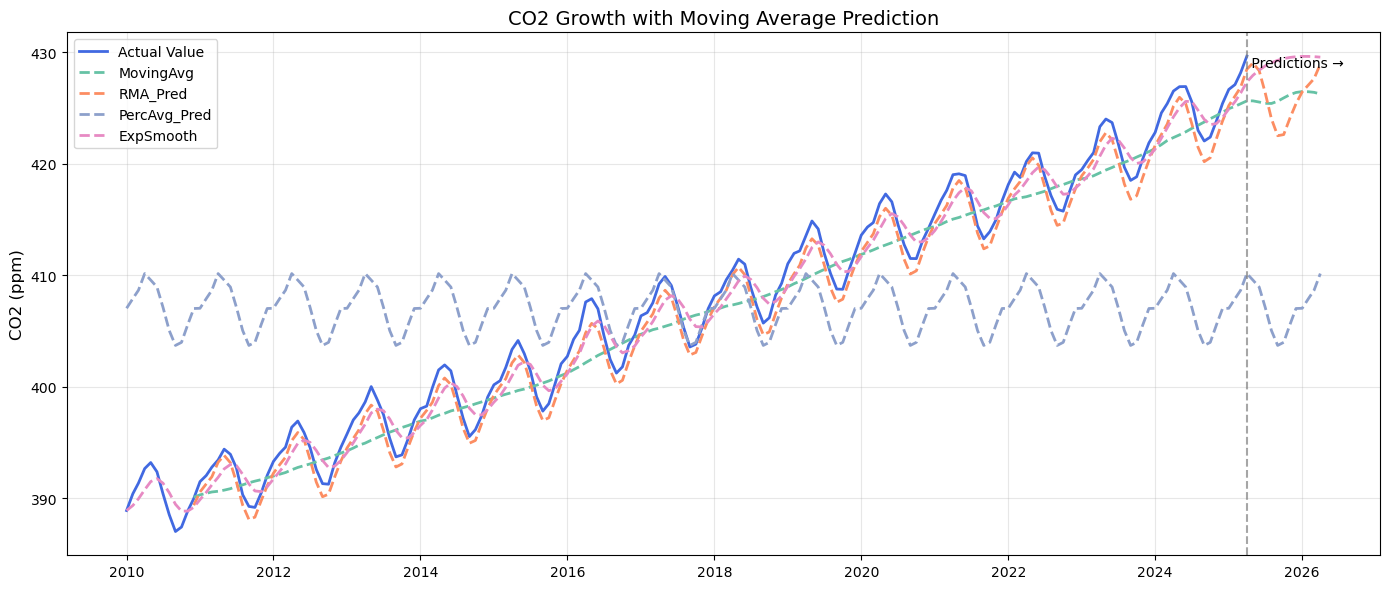

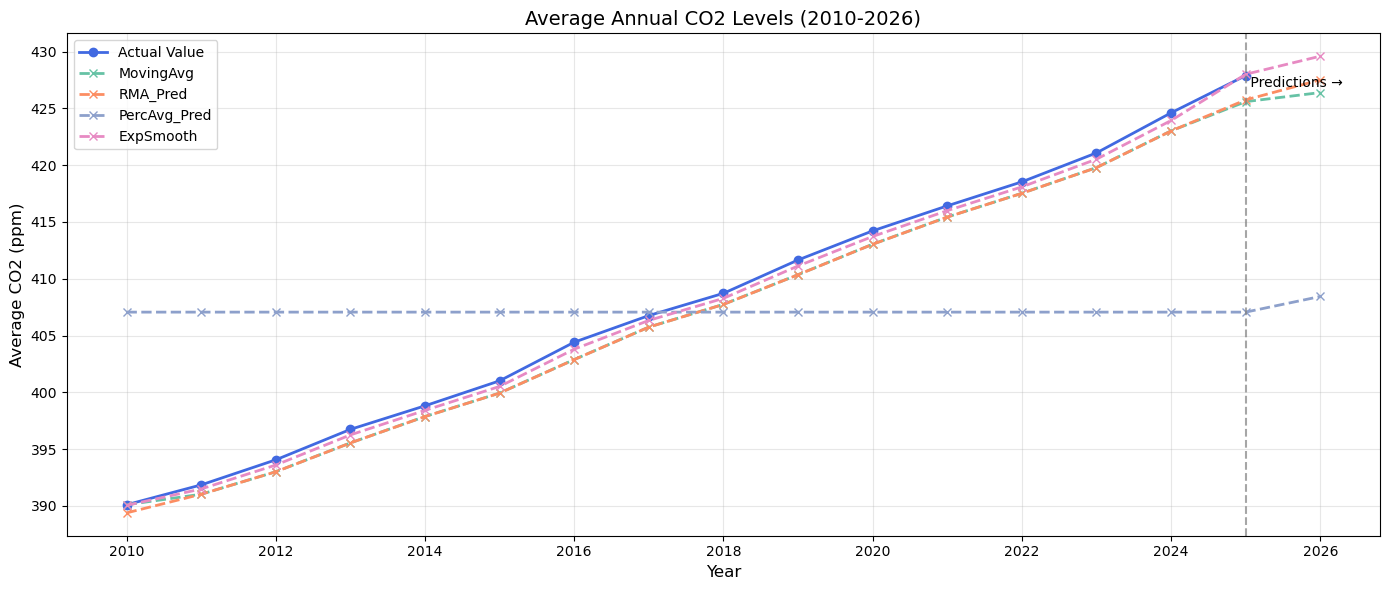

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

colsName = ['MovingAvg', 'RMA_Pred', 'PercAvg_Pred', 'ExpSmooth']

plotTimeSeries(df, otherCols=colsName, title='CO2 Growth with Moving Average Prediction')
plt.savefig('../plots/processed_CO2_growth.png')
plt.show()



df['Date'] = pd.to_datetime(df['Date'])
yearlyPlot = plotYearlyAvg(df, otherCols=colsName, title='Average Annual CO2 Levels (2010-2026)')
plt.savefig('../plots/processed_yearly_trend_avg.png')
plt.show()